# **Description**
<p align="justify">
Python script bellow creates neural network model for solving simple regression problem. It predicts house price in Boston (based on data from 1970.).
</p>

Training dataset shape: (404, 13)
Testing dataset shape: (102, 13)
Total number of features: 13
Features characteristics:                0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  

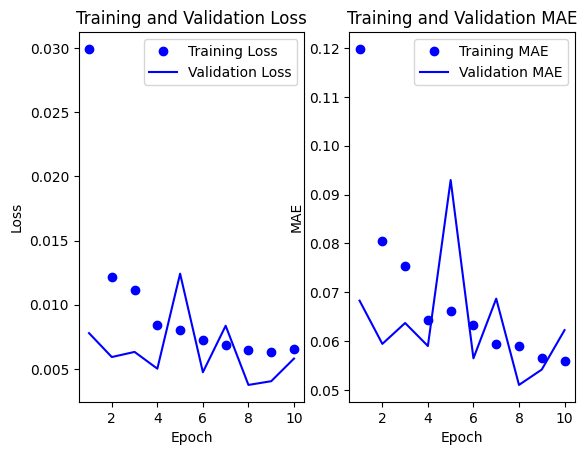

4/4 [==============================] - 0s 3ms/step - loss: 0.0160 - mae: 0.0797


[0.016024580225348473, 0.07970263063907623]

In [5]:
from keras.datasets import boston_housing
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras import models
from keras import layers
import matplotlib.pyplot as plt


# LOADING DATASET
(xTrain, yTrain), (xTest, yTest) = boston_housing.load_data()


# ANALYZING DATA
print(f"Training dataset shape: {xTrain.shape}")
print(f"Testing dataset shape: {xTest.shape}")
print(f"Total number of features: {xTrain.shape[1]}")
print(f"Features characteristics: {pd.concat([pd.DataFrame(xTest), pd.DataFrame(xTrain)]).describe()}")
print(f"Targets characteristics: {pd.concat([pd.DataFrame(yTrain), pd.DataFrame(yTest)]).describe()}")


# NORMALIZING DATA
minMaxScalerFeatures = MinMaxScaler().fit(xTrain)
xTrain = minMaxScalerFeatures.transform(xTrain)
xTest = minMaxScalerFeatures.transform(xTest)
minMaxScalerTargets = MinMaxScaler().fit(yTrain.reshape(-1, 1))
yTrain = minMaxScalerTargets.transform(yTrain.reshape(-1, 1))
yTest = minMaxScalerTargets.transform(yTest.reshape(-1, 1))


# CREATING NEURAL NETWORK MODEL
def getNeuralNetworkModel():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = "relu", input_shape = (13,)))
  model.add(layers.Dense(64, activation = "relu"))
  model.add(layers.Dense(1))
  return model

model = getNeuralNetworkModel()


# COMPILING NEURAL NETWORK MODEL
model.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])


# TRAINING
trainingHistory = model.fit(xTrain, yTrain, epochs = 100, batch_size = 1, validation_split = 0.1)
history = trainingHistory.history


# ANALYZING TRAINING RESULTS
def smoothCurve(points, factor = 0.9):
  smoothedPoints = []
  for point in points:
    if smoothedPoints:
      previousPoint = smoothedPoints[-1]
      smoothedPoints.append(previousPoint * factor + point * (1 - factor))
    else:
      smoothedPoints.append(point)
  return smoothedPoints

lossValues = history["loss"]
validationLossValues = history["val_loss"]
epochs = range(1, len(lossValues) + 1)
plt.subplot(1, 2, 1)
plt.plot(epochs, lossValues, "bo", label = "Training Loss")
plt.plot(epochs , validationLossValues, "b", label = "Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

maeValues = history["mae"]
validationMaeValues = history["val_mae"]
plt.subplot(1, 2, 2)
plt.plot(epochs, maeValues, "bo", label = "Training MAE")
plt.plot(epochs, validationMaeValues, "b", label = "Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Training and Validation MAE")
plt.legend()

plt.show()


# EVALUATION
model.evaluate(xTest, yTest)